In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [2]:
# Load the data from CSV using the Pandas library
df = pd.read_csv('/Users/markraeven17/COMPSCI/DataScienceProject/crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,992.673282,18.026142,True,True,140,8.527341,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,147.998025,29.794042,False,False,106,1.127443,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,False,True,146,6.517573,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,730.379174,31.620687,True,True,110,7.248251,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
df_encoded['Fertilizer_Used'] = df['Fertilizer_Used'].map({True: 1.0 , False: 0.0})
df['Irrigation_Used'] = df['Irrigation_Used'].map({True: 1.0 , False: 0.0})
X = df_encoded.drop(columns=['Yield_tons_per_hectare'])
y= df_encoded[['Yield_tons_per_hectare']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_predict = model.predict(X_test)

In [9]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive, then calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_scores)

# Calculate the average RMSE across all folds
mean_rmse = rmse_scores.mean()

print("RMSE for each fold:", rmse_scores)
print("Average RMSE using cross-validation:", mean_rmse)

RMSE for each fold: [0.49956591 0.5010421  0.50115296 0.50071044 0.49996992]
Average RMSE using cross-validation: 0.5004882649771912


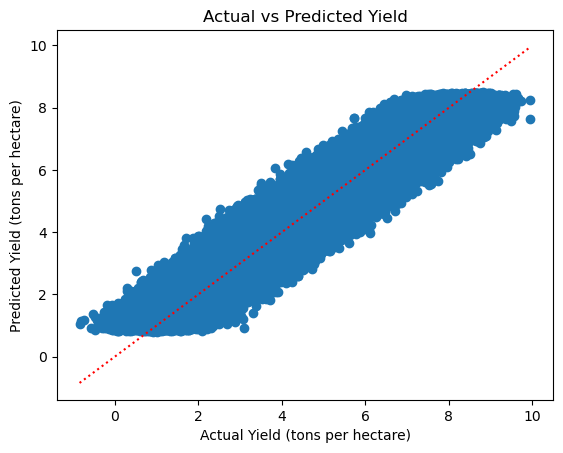

In [47]:
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle=':')
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield (tons per hectare)')
plt.title('Actual vs Predicted Yield')
plt.show()

In [48]:
coefficients = model.coef_.flatten() 
feature_names = X.columns.tolist()
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

print(importance_df)

                     Feature   Coefficient
6               Region_North  1.126085e+10
8                Region_West  1.125545e+10
5                Region_East  1.124973e+10
7               Region_South  1.124908e+10
22   Weather_Condition_Rainy  8.709539e+09
23   Weather_Condition_Sunny  8.709483e+09
21  Weather_Condition_Cloudy  8.706383e+09
0                Rainfall_mm  1.297719e+00
2            Fertilizer_Used  7.497954e-01
3            Irrigation_Used  5.997302e-01
1        Temperature_Celsius  1.440420e-01
4            Days_to_Harvest  9.302103e-04
19              Crop_Soybean -6.234980e+09
15               Crop_Barley -6.245383e+09
17                Crop_Maize -6.245490e+09
16               Crop_Cotton -6.247545e+09
18                 Crop_Rice -6.247738e+09
20                Crop_Wheat -6.250197e+09
10            Soil_Type_Clay -8.718985e+09
12           Soil_Type_Peaty -8.720814e+09
9           Soil_Type_Chalky -8.722012e+09
11            Soil_Type_Loam -8.727642e+09
14         

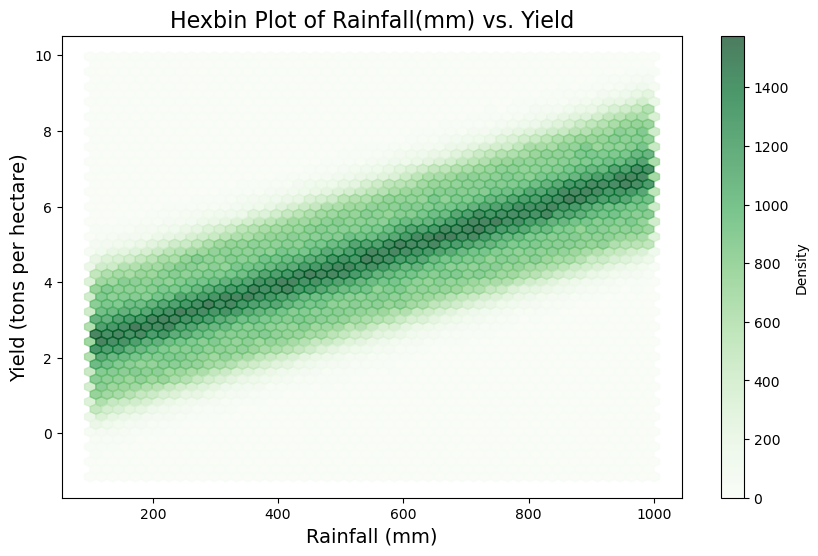